### Import videos and packages

In [58]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os
import sys
from pathlib import Path
from PIL import Image, ImageOps

# open source implementation of LBP
from skimage.feature import local_binary_pattern
from sklearn import preprocessing, metrics
from sklearn.svm import LinearSVC, SVC

import seaborn as sns

In [156]:
PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'



name = 'Kyle' ### Name of person who we are adding to train/test folders

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'Current', 'Date')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'train')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PYTHONPATH)
new_abs_path = os.path.join(script_path, 'test')
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtrain)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

script_path = os.path.realpath(PATHtest)
new_abs_path = os.path.join(script_path, name)
if not os.path.exists(new_abs_path):
  os.mkdir(new_abs_path)

In [158]:
PATHtrainNEW = PATHtrain + '\\' + name
PATHtestNEW = PATHtest + '\\' + name


vidcap = cv2.VideoCapture(name + '.mp4') ### mp4 file needs to be name.mp4 EXAMPLE kyle.mp4
success,image = vidcap.read()
count = 0;
print("I am in success")
while success:
    # Resize image
    scale_percent = 30 # percent of original size # was 30
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    # Write to folder
    if count%5 == 0:
        cv2.imwrite(os.path.join(PATHtestNEW,"frame%d.png") % count, resize)
    else:
        cv2.imwrite(os.path.join(PATHtrainNEW,"frame%d.png") % count, resize)
    success,image = vidcap.read()
    if cv2.waitKey(10) == 27:
        break
    count += 1
print(f'Complete')

I am in success
Complete


### Break videos into frames

In [ ]:
#Done

### Reduce pixels in the frames

In [ ]:
#Done

### Split frames into test/train

In [29]:
## I manually added this

### Trying to load this now

In [63]:
def compute_lbp(arr):
    """Find LBP of all pixels.
    Also perform Vectorization/Normalization to get feature vector.
    """
    # LBP function params
    radius = 3
    n_points = 8 * radius
    n_bins = n_points + 2
    lbp = local_binary_pattern(arr, n_points, radius, 'uniform')
    lbp = lbp.ravel()
    # feature_len = int(lbp.max() + 1)
    feature = np.zeros(n_bins)
    for i in lbp:
        feature[int(i)] += 1
    feature /= np.linalg.norm(feature, ord=1)
    return feature


def load_data(tag='train'):
    """Load (training/test) data from the directory.
    Also do preprocessing of extra features. 
    """
    tag_dir = Path.cwd() / tag
    vec = []
    cat = []
    for cat_dir in tag_dir.iterdir():
        cat_label = cat_dir.stem
        for img_path in cat_dir.glob('*.png'):
            img = Image.open(img_path.as_posix())
            if img.mode != 'L':
                img = ImageOps.grayscale(img)
                img.save(img_path.as_posix())
            arr = np.array(img)
            feature = compute_lbp(arr)
            vec.append(feature)
            cat.append(cat_label)
    return vec, cat


In [77]:
vec_test, cat_test = load_data('test')
vec_train, cat_train = load_data('train')

#### List categories

In [78]:
# get unique categories
labels = list(np.unique(np.array(cat_test)))
labels

['Jason', 'Josh', 'Kyle', 'Logan']

#### Begin Classification

#### Label Encoder

In [79]:
le = preprocessing.LabelEncoder()
label_train = le.fit_transform(cat_train)
label_test = le.transform(cat_test)

### Support Vector Machine Fit

In [80]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(vec_train, label_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

#### First Evaluation

Accuracy: 97.46%


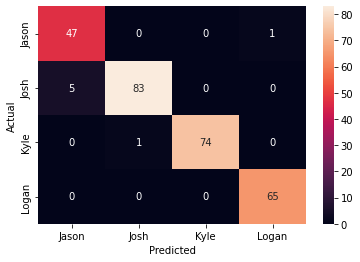

In [81]:
# test set evaluation
prediction = clf.predict(vec_test)
# visualization
cmat = metrics.confusion_matrix(prediction,label_test)
s = sns.heatmap(cmat,annot=True,xticklabels=labels, yticklabels=labels)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

### Non-linear Fit

In [82]:
clf = SVC(gamma='scale', C=1.0, random_state=101)
clf.fit(vec_train,label_train)
#yP = svm.predict(XB)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=101, shrinking=True, tol=0.001,
    verbose=False)

#### Eval 2


Accuracy: 97.83%


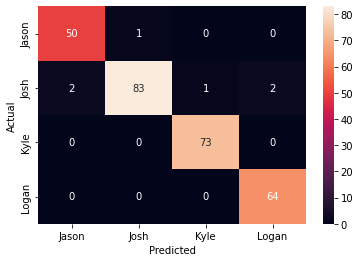

In [83]:
# test set evaluation
prediction = clf.predict(vec_test)
# visualization
cmat = metrics.confusion_matrix(prediction,label_test)
s = sns.heatmap(cmat,annot=True,xticklabels=labels, yticklabels=labels)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

In [108]:
PATHcurrent = PYTHONPATH +'\\Current'+'\\Date'

#### Code from old. Does it recognize me?

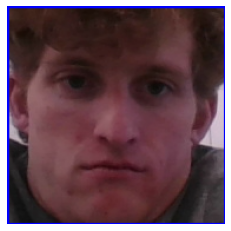

In [147]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%i
        plt.savefig(os.path.join(PATHcurrent,filename))
        plt.show()

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
while time.time()-t <=3: # run for max 3 sec

    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.imwrite('image.png',frame) 
video_capture.release()
cv2.destroyAllWindows()

pixels = plt.imread('image.png')

if len(faces) > 0:
    draw_faces(pixels,faces)

else:
    print(f'No faces detected.')

##### Load

In [150]:
current,title = load_data('Current')

##### using classifier to see who it detects

In [151]:
value = clf.predict(current)
value

array([0, 0, 3], dtype=int64)